# Exploring the other DataFrames that contain hypotetical features

The aim is to clean the other dataframes to be used for the feature selection

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [18]:
# We'll import the dataframe that results from the datafiles in "raw_df_for_features"
# and at the end we'll export one file with all of the hypothetical features

In [19]:
df = pd.read_csv('Data.csv')

#Reinstating the index 
df.loc[:,'date'] = pd.to_datetime(df.loc[:,'date'][:-1],format='%Y-%m ').dt.strftime('%Y-%m')
df.set_index(['country','date'], inplace=True)

#Converting data into numeric types
for i in df.index:
    for j in df.columns:
        df.loc[i,j] = float(df.loc[i,j])

display(df)

df.info()

df.to_csv('CleanData.csv', index=True)

Electricity import (GWh)  Electricity export (GWh)  \
country date                                                          
AL      2007-01                       NaN                       NaN   
        2007-02                       NaN                       NaN   
        2007-03                       NaN                       NaN   
        2007-04                       NaN                       NaN   
        2007-05                       NaN                       NaN   
...                                   ...                       ...   
XK      2023-10                   513.611                   243.327   
        2023-11                       NaN                       NaN   
        2023-12                       NaN                       NaN   
        2024-01                       NaN                       NaN   
        NaN                           NaN                       NaN   

                 Electricity available (GWh)  \
country date                                   
AL      2007-01                          NaN   
        2007-02                          NaN   
        2007-03                          NaN   
        2007-04                          NaN   
        2007-05                          NaN   
...                                      ...   
XK      2023-10                       198.32   
        2023-11                          NaN   
        2023-12                          NaN   
        2024-01                          NaN   
        NaN                              NaN   

                 Electricity generated from natural gas GWh  \
country date                                                  
AL      2007-01                                         NaN   
        2007-02                                         NaN   
        2007-03                                         NaN   
        2007-04                                         NaN   
        2007-05                                         NaN   
...                                                     ...   
XK      2023-10                                         0.0   
        2023-11                                         NaN   
        2023-12                                         NaN   
        2024-01                                         NaN   
        NaN                                             NaN   

                 Total electricity generated GWh  \
country date                                       
AL      2007-01                              NaN   
        2007-02                              NaN   
        2007-03                              NaN   
        2007-04                              NaN   
        2007-05                              NaN   
...                                          ...   
XK      2023-10                          468.603   
        2023-11                              NaN   
        2023-12                              NaN   
        2024-01                              NaN   
        NaN                                  NaN   

                 Fraction of electricity generated by gas  Gas imported Mm3  \
country date                                                                  
AL      2007-01                                       NaN               NaN   
        2007-02                                       NaN               NaN   
        2007-03                                       NaN               NaN   
        2007-04                                       NaN               NaN   
        2007-05                                       NaN               NaN   
...                                                   ...               ...   
XK      2023-10                                       0.0               NaN   
        2023-11                                       NaN               NaN   
        2023-12                                       NaN               NaN   
        2024-01                                       NaN               NaN   
        NaN            

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 8834 entries, ('AL', '2007-01') to ('XK', nan)
Data columns (total 18 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Electricity import (GWh)                        7082 non-null   float64
 1   Electricity export (GWh)                        7081 non-null   float64
 2   Electricity available (GWh)                     7081 non-null   float64
 3   Electricity generated from natural gas GWh      3135 non-null   float64
 4   Total electricity generated GWh                 3101 non-null   float64
 5   Fraction of electricity generated by gas        3066 non-null   float64
 6   Gas imported Mm3                                4055 non-null   float64
 7   Gas consumed Mm3                                4077 non-null   float64
 8   Gas exported Mm3                                3916 non-null   float64
 9   Gas from other sou

### Let's delete some dates/timestamps

In [20]:
df = pd.read_csv('CleanData.csv')
#Reinstating the index 
df.loc[:,'date'] = pd.to_datetime(df.loc[:,'date'][:-1],format='%Y-%m')
df.set_index(['country','date'], inplace=True)

#rows with little non-NaN values
df = df.dropna(thresh=round(len(df.columns)/3))

#rows after february 2020 (start of covid spreading in europe)
#df = df.loc[(slice(None), slice(None, pd.to_datetime("2020-02",format='%Y-%m'))), :]


df.info()
display(df)

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 6663 entries, ('AL', Timestamp('2018-01-01 00:00:00')) to ('XK', Timestamp('2023-10-01 00:00:00'))
Data columns (total 18 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Electricity import (GWh)                        6585 non-null   float64
 1   Electricity export (GWh)                        6584 non-null   float64
 2   Electricity available (GWh)                     6584 non-null   float64
 3   Electricity generated from natural gas GWh      3135 non-null   float64
 4   Total electricity generated GWh                 3101 non-null   float64
 5   Fraction of electricity generated by gas        3066 non-null   float64
 6   Gas imported Mm3                                4050 non-null   float64
 7   Gas consumed Mm3                                4072 non-null   float64
 8   Gas exported Mm3                           

Electricity import (GWh)  Electricity export (GWh)  \
country date                                                             
AL      2018-01-01                   588.340                    97.366   
        2018-02-01                   542.046                    10.377   
        2018-03-01                   564.343                     6.913   
        2018-04-01                   465.565                     6.436   
        2018-05-01                   476.886                    11.847   
...                                      ...                       ...   
XK      2023-06-01                   454.795                   201.925   
        2023-07-01                   520.260                   268.050   
        2023-08-01                   514.419                   293.908   
        2023-09-01                   459.781                   246.256   
        2023-10-01                   513.611                   243.327   

                    Electricity available (GWh)  \
country date                                      
AL      2018-01-01                      244.825   
        2018-02-01                      379.292   
        2018-03-01                      580.513   
        2018-04-01                      593.729   
        2018-05-01                      432.244   
...                                         ...   
XK      2023-06-01                      196.891   
        2023-07-01                      226.059   
        2023-08-01                      202.609   
        2023-09-01                      202.573   
        2023-10-01                      198.320   

                    Electricity generated from natural gas GWh  \
country date                                                     
AL      2018-01-01                                         0.0   
        2018-02-01                                         0.0   
        2018-03-01                                         0.0   
        2018-04-01                                         0.0   
        2018-05-01                                         0.0   
...                                                        ...   
XK      2023-06-01                                         0.0   
        2023-07-01                                         0.0   
        2023-08-01                                         0.0   
        2023-09-01                                         0.0   
        2023-10-01                                         0.0   

                    Total electricity generated GWh  \
country date                                          
AL      2018-01-01                          884.286   
        2018-02-01                         1054.965   
        2018-03-01                         1291.465   
        2018-04-01                         1174.183   
        2018-05-01                         1007.731   
...                                             ...   
XK      2023-06-01                          449.761   
        2023-07-01                          478.270   
        2023-08-01                          423.120   
        2023-09-01                          416.098   
        2023-10-01                          468.603   

                    Fraction of electricity generated by gas  \
country date                                                   
AL      2018-01-01                                       0.0   
        2018-02-01                                       0.0   
        2018-03-01                                       0.0   
        2018-04-01                                       0.0   
        2018-05-01                                       0.0   
...                                                      ...   
XK      2023-06-01                                       0.0   
        2023-07-01                                       0.0   
        2023-08-01                                       0.0   
        2023-09-01                                       0.0   
        2023-10-01                                

### Let's see what are the countries which depend most on gas

In [21]:
df.loc[(slice(None),slice(None)),'Fraction of electricity generated by gas'] > 0.4

pd.options.display.max_seq_items = 1000
display(df.loc[df.loc[df['Fraction of electricity generated by gas'] > 0.55].index[:],['Electricity generated from natural gas GWh','Fraction of electricity generated by gas']])
gascountries = df.loc[df['Fraction of electricity generated by gas'] > 0.55].index[:].get_level_values('country').unique()
print(gascountries)
pd.options.display.max_seq_items = 100

Electricity generated from natural gas GWh  \
country date                                                     
GE      2022-12-01                                     662.019   
        2023-01-01                                     697.429   
        2023-02-01                                     615.655   
IE      2017-06-01                                    1293.201   
        2017-07-01                                    1477.708   
...                                                        ...   
NL      2020-09-01                                    5732.896   
        2020-11-01                                    5916.833   
        2020-12-01                                    6120.870   
        2021-02-01                                    5860.451   
        2021-06-01                                    4780.527   

                    Fraction of electricity generated by gas  
country date                                                  
GE      2022-12-01                                  0.612479  
        2023-01-01                                  0.649910  
        2023-02-01                                  0.645236  
IE      2017-06-01                                  0.572542  
        2017-07-01                                  0.628362  
...                                                      ...  
NL      2020-09-01                                  0.578006  
        2020-11-01                                  0.582692  
        2020-12-01                                  0.578108  
        2021-02-01                                  0.554794  
        2021-06-01                                  0.556338  

[118 rows x 2 columns]

Index(['GE', 'IE', 'IT', 'LT', 'LV', 'MD', 'MT', 'NL'], dtype='object', name='country')


It seems the countries which most rely on gas to produce electricity are Germany, Ireland, Italy, Latvia, Lithuania, Moldova, Malta and the Netherlands. We will analyze Italy as its dataset seems most complete and interesting (Germany has data only from 2018 on and the Netherlands data are not well correlated, both from the correlation matrix and from the plots)

In [22]:
pd.set_option('display.max_rows', 100)
display(df.loc[(gascountries,slice(None)),'Fraction of electricity generated by gas'])
display(df.loc['IT'])
pd.set_option('display.max_rows', 100)

country  date      
GE       2018-01-01    0.316222
         2018-02-01    0.346337
         2018-03-01    0.205239
         2018-04-01    0.030306
         2018-05-01    0.062851
                         ...   
NL       2023-10-01    0.336563
         2023-11-01    0.339599
         2023-12-01    0.380498
         2024-01-01         NaN
         2024-02-01         NaN
Name: Fraction of electricity generated by gas, Length: 1274, dtype: float64

Electricity import (GWh)  Electricity export (GWh)  \
date                                                             
2008-01-01                   29553.0                    3887.0   
2008-02-01                   28257.0                    3759.0   
2008-03-01                   28293.0                    3846.0   
2008-04-01                   26854.0                    3711.0   
2008-05-01                   27233.0                    4043.0   
...                              ...                       ...   
2023-10-01                   25351.0                    4987.0   
2023-11-01                   24829.0                    4810.0   
2023-12-01                   24869.0                    4924.0   
2024-01-01                       NaN                       NaN   
2024-02-01                       NaN                       NaN   

            Electricity available (GWh)  \
date                                      
2008-01-01                        275.0   
2008-02-01                        365.0   
2008-03-01                        473.0   
2008-04-01                        185.0   
2008-05-01                        194.0   
...                                 ...   
2023-10-01                        211.0   
2023-11-01                        266.0   
2023-12-01                        402.0   
2024-01-01                          NaN   
2024-02-01                          NaN   

            Electricity generated from natural gas GWh  \
date                                                     
2008-01-01                                         NaN   
2008-02-01                                         NaN   
2008-03-01                                         NaN   
2008-04-01                                         NaN   
2008-05-01                                         NaN   
...                                                ...   
2023-10-01                                      9532.0   
2023-11-01                                      8484.0   
2023-12-01                                      9749.0   
2024-01-01                                         NaN   
2024-02-01                                         NaN   

            Total electricity generated GWh  \
date                                          
2008-01-01                              NaN   
2008-02-01                              NaN   
2008-03-01                              NaN   
2008-04-01                              NaN   
2008-05-01                              NaN   
...                                     ...   
2023-10-01                          20770.0   
2023-11-01                          20469.0   
2023-12-01                          20483.0   
2024-01-01                              NaN   
2024-02-01                              NaN   

            Fraction of electricity generated by gas  Gas imported Mm3  \
date                                                                     
2008-01-01                                       NaN               NaN   
2008-02-01                                       NaN               NaN   
2008-03-01                                       NaN               NaN   
2008-04-01                                       NaN               NaN   
2008-05-01                                       NaN               NaN   
...                                              ...               ...   
2023-10-01                                  0.458931            4865.0   
2023-11-01                                  0.414480            4814.0   
2023-12-01                                  0.475956            4836.0   
2024-01-01                                       NaN            4583.0   
2024-02-01                                       NaN            4540.0   

            Gas consumed Mm3  Gas exported Mm3  Gas from other sources Mm3  \
date                                                                         
2008-01-01               NaN               NaN                         NaN   
2008-02-01               NaN 

The Netherlands, Germany and Italy have the most complete data on this front. Our choice for the analysis will be Italy.

### Italian exploratory data analysis

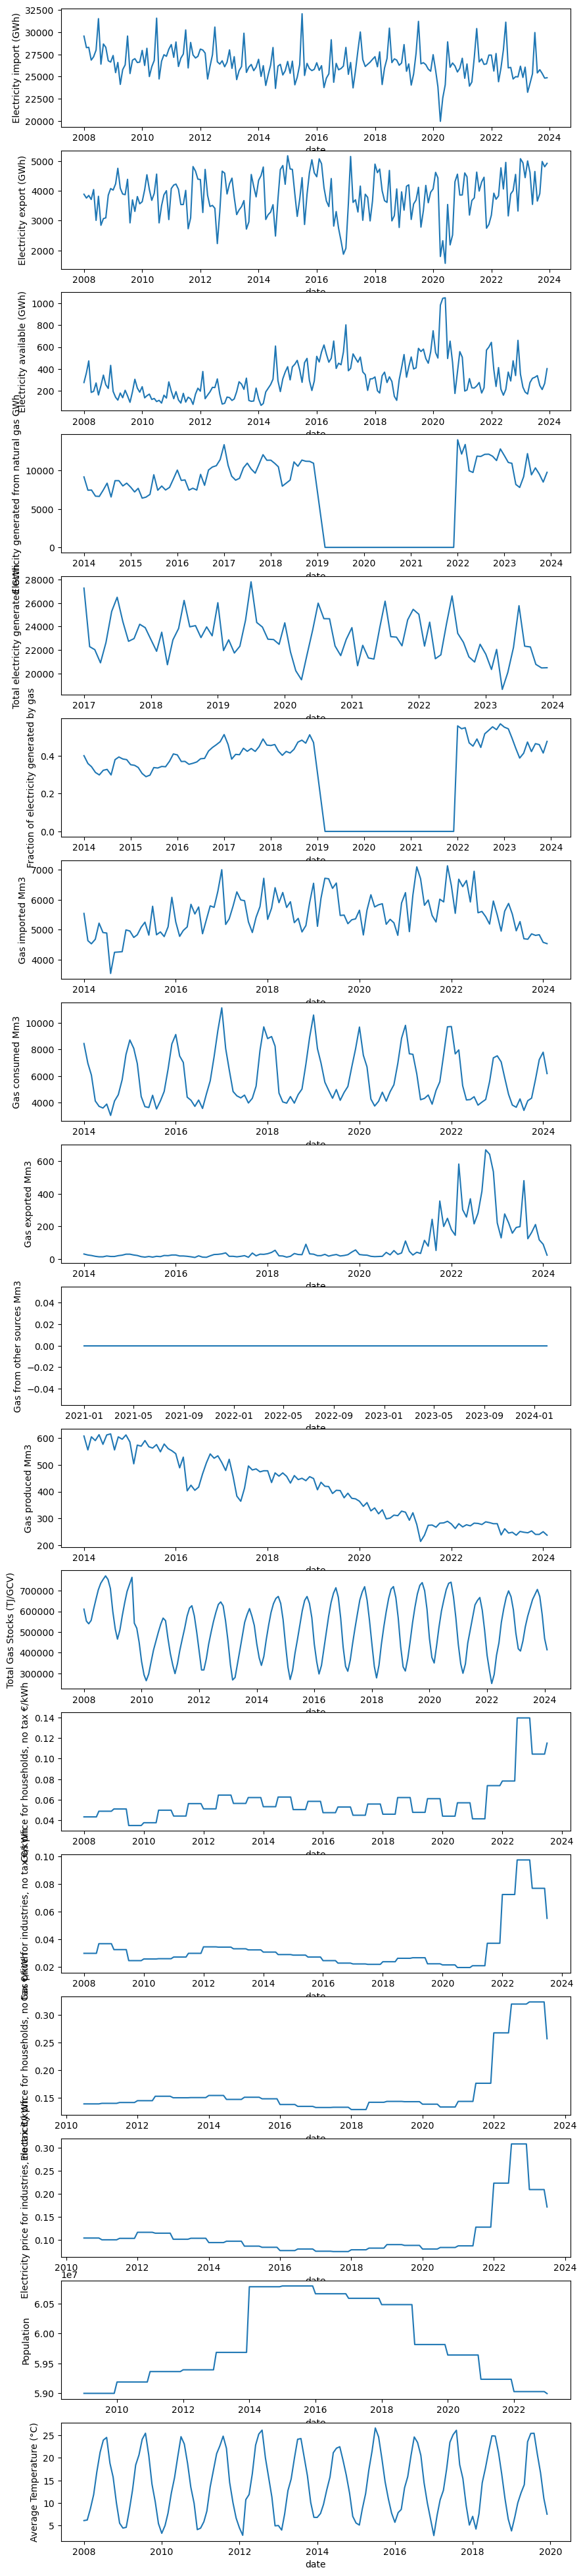

In [23]:
#Creating a datafile for Italy only
dfIT = df.loc['IT']
df_melted = dfIT.melt(id_vars=['Electricity import (GWh)'], value_vars=['Electricity available (GWh)'])

# Plotting everything

fig, axes = plt.subplots(len(df.columns),1,figsize = (10,50))

for i in range(0,len(dfIT.columns)):
    sb.lineplot(data = dfIT[dfIT.columns[i]], ax=axes[i]) 



Let's investigate if the data available only from 2014 (Gas flow) or 2017 (Electricity production) on are influential to regress gas imports. Let's start by plotting the gas data against gas consumption.

Correlation matrix for all periods:


Electricity import (GWh)  \
Electricity import (GWh)                                        1.000000   
Electricity export (GWh)                                        0.173621   
Electricity available (GWh)                                    -0.260195   
Electricity generated from natural gas GWh                      0.133923   
Total electricity generated GWh                                 0.872657   
Fraction of electricity generated by gas                       -0.042355   
Gas imported Mm3                                                0.246648   
Gas consumed Mm3                                                0.116794   
Gas exported Mm3                                               -0.026956   
Gas from other sources Mm3                                           NaN   
Gas produced Mm3                                                0.044613   
Total Gas Stocks Mm3                                            0.142806   
Gas price for households, no tax €/kWh                         -0.028856   
Gas price for industries, no tax €/kWh                         -0.042800   
Electricity price for households, no tax €/kWh                 -0.082026   
Electricity price for industries, no tax €/kWh                 -0.010198   
Population                                                     -0.127351   
Average Temperature (°C)                                        0.185359   

                                                Electricity export (GWh)  \
Electricity import (GWh)                                        0.173621   
Electricity export (GWh)                                        1.000000   
Electricity available (GWh)                                    -0.407152   
Electricity generated from natural gas GWh                      0.070528   
Total electricity generated GWh                                -0.295181   
Fraction of electricity generated by gas                        0.113586   
Gas imported Mm3                                               -0.217961   
Gas consumed Mm3                                                0.153488   
Gas exported Mm3                                                0.118285   
Gas from other sources Mm3                                           NaN   
Gas produced Mm3                                               -0.051625   
Total Gas Stocks Mm3                                           -0.221552   
Gas price for households, no tax €/kWh                          0.143427   
Gas price for industries, no tax €/kWh                          0.176613   
Electricity price for households, no tax €/kWh                  0.201462   
Electricity price for industries, no tax €/kWh                  0.152185   
Population                                                     -0.003395   
Average Temperature (°C)                                       -0.347137   

                                                Electricity available (GWh)  \
Electricity import (GWh)                                          -0.260195   
Electricity export (GWh)                                          -0.407152   
Electricity available (GWh)                                        1.000000   
Electricity generated from natural gas GWh                        -0.185859   
Total electricity generated GWh                                    0.162437   
Fraction of electricity generated by gas                          -0.224364   
Gas imported Mm3                                                   0.191843   
Gas consumed Mm3                                                   0.087870   
Gas exported Mm3                                                  -0.131768   
Gas from other sources Mm3                                              NaN   
Gas produced Mm3                                                  -0.043389   
Total Gas Stocks Mm3                                               0.048461   
Gas price for households, no tax €/kWh                             0.028893   
Gas price for industries, no tax €/kWh              

Correlation matrix excluding years after 2019:


Electricity import (GWh)  \
Electricity import (GWh)                                        1.000000   
Electricity export (GWh)                                        0.151433   
Electricity available (GWh)                                    -0.142037   
Electricity generated from natural gas GWh                      0.162223   
Total electricity generated GWh                                 0.903584   
Fraction of electricity generated by gas                        0.021332   
Gas imported Mm3                                                0.367072   
Gas consumed Mm3                                                0.106563   
Gas exported Mm3                                                0.070431   
Gas from other sources Mm3                                           NaN   
Gas produced Mm3                                               -0.159609   
Total Gas Stocks Mm3                                            0.164137   
Gas price for households, no tax €/kWh                         -0.019639   
Gas price for industries, no tax €/kWh                          0.078511   
Electricity price for households, no tax €/kWh                 -0.071247   
Electricity price for industries, no tax €/kWh                  0.167339   
Population                                                     -0.222302   
Average Temperature (°C)                                        0.185359   

                                                Electricity export (GWh)  \
Electricity import (GWh)                                        0.151433   
Electricity export (GWh)                                        1.000000   
Electricity available (GWh)                                    -0.263286   
Electricity generated from natural gas GWh                     -0.017653   
Total electricity generated GWh                                -0.278587   
Fraction of electricity generated by gas                       -0.012236   
Gas imported Mm3                                               -0.215205   
Gas consumed Mm3                                                0.197301   
Gas exported Mm3                                               -0.010068   
Gas from other sources Mm3                                           NaN   
Gas produced Mm3                                                0.112846   
Total Gas Stocks Mm3                                           -0.285287   
Gas price for households, no tax €/kWh                         -0.043542   
Gas price for industries, no tax €/kWh                          0.044799   
Electricity price for households, no tax €/kWh                  0.079758   
Electricity price for industries, no tax €/kWh                 -0.000508   
Population                                                      0.022043   
Average Temperature (°C)                                       -0.347137   

                                                Electricity available (GWh)  \
Electricity import (GWh)                                          -0.142037   
Electricity export (GWh)                                          -0.263286   
Electricity available (GWh)                                        1.000000   
Electricity generated from natural gas GWh                        -0.176691   
Total electricity generated GWh                                    0.338239   
Fraction of electricity generated by gas                          -0.206658   
Gas imported Mm3                                                   0.269202   
Gas consumed Mm3                                                   0.008884   
Gas exported Mm3                                                  -0.121439   
Gas from other sources Mm3                                              NaN   
Gas produced Mm3                                                  -0.341168   
Total Gas Stocks Mm3                                               0.049602   
Gas price for households, no tax €/kWh                             0.039323   
Gas price for industries, no tax €/kWh              

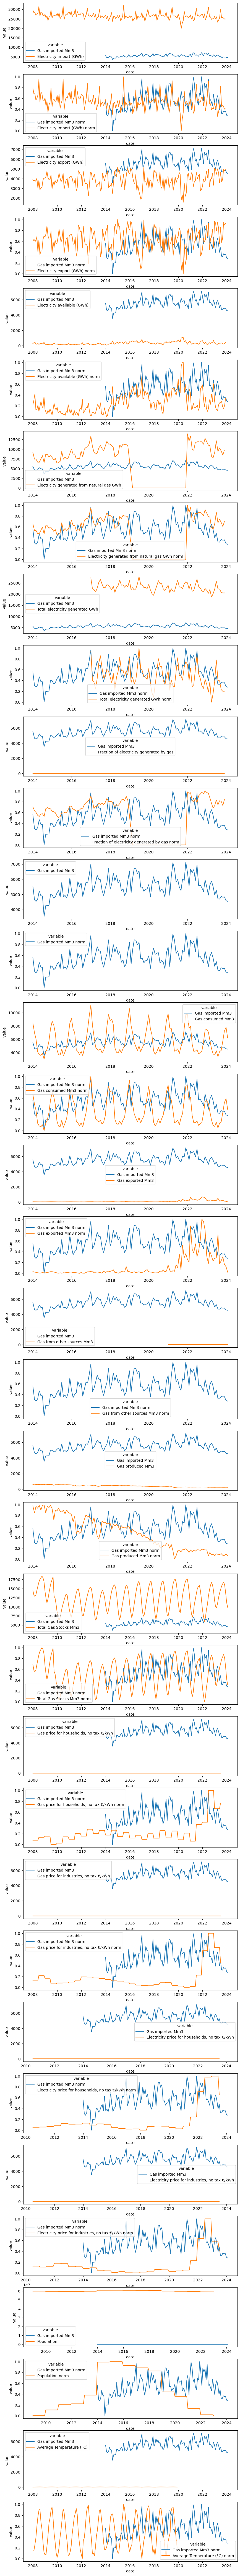

In [24]:
#Plotting normalized data
dfIT.rename(columns = {'Total Gas Stocks (TJ/GCV)':'Total Gas Stocks Mm3'}, inplace = True) 
dfIT['Total Gas Stocks Mm3'] = dfIT['Total Gas Stocks Mm3']/52.5 #MJ/kg Assumed HHV from theengineeringtoolbox = MLN kg
dfIT['Total Gas Stocks Mm3'] = dfIT['Total Gas Stocks Mm3']/0.8 #kg/m3 density of natural gas from theengineeringtoolbox = MLN m3

dfITn = dfIT.copy(deep=True)

for column in dfITn.columns: #what I do here is put all values on a scale from 0 to 1, where 0 corresponds to min value and 1 to max value
    dfITn.loc[:,column] = (dfITn.loc[:,column] - dfITn.loc[:,column].min())/(dfITn.loc[:,column].max() - dfITn.loc[:,column].min())

#Plotting all data, normalized and not

dfITn = dfITn.add_suffix(' norm')
dfITn = dfITn.reset_index()
dfIT = dfIT.reset_index()
dfPlot = pd.concat([dfIT,dfITn])

fig, axes = plt.subplots(len(dfPlot.columns)-1,1,figsize = (10,120))

j = 0
k = 1
for i in range(0,int((len(dfPlot.columns)-1)/2)):
    sb.lineplot(x='date', y='value', hue='variable',data = pd.melt(dfPlot[['date','Gas imported Mm3',dfPlot.columns[k]]], ['date']), ax=axes[j])
    j = j + 1
    sb.lineplot(x='date', y='value', hue='variable',data = pd.melt(dfPlot[['date','Gas imported Mm3 norm',dfPlot.columns[int(k+(len(dfPlot.columns)-1)/2)]]], ['date']), ax=axes[j])
    j = j + 1
    k = k + 1

dfITn = dfITn.set_index('date')
dfIT = dfIT.set_index('date')

print('Correlation matrix for all periods:')
display(dfIT.corr())
print('Correlation matrix excluding years after 2019:')
display(dfIT.loc[dfIT.index < '2020-01-01'].corr())

It seems that the amount of electricity generated by gas (and as such the fraction of electricity generated by gas) is not a good indicator of how much gas Italy imports, while the gas consumed is. We can see that the electricity import goes similarly with gas imports. Electricity exports and electricity available to market (that is to say: electricity surplus) are not that well correlated to the metric of our interest. The electricity generated shows some peaks in correspondance to the gas imports, but most of it looks delayed of some months. The comparison between gas imports and gas consumption shows that when Italy consumes lots of gas, it also imports a lot of gas (peaks in the graph) if it is winter. If it's summer, Italy still relies on gas for electricity generation but it doesn't import as much gas. Data also shows that Italy relies on stocking gas in the winter to use it later in the summer. On the other hand, the amount of gas produced and the amount of gas exported are so little to not have any impact on the rest of the metrics. The data about population does not seem to look well correlated to anything else (its high correlation with gas produced is considered fortuituos, same goes for the fraction of elextricity consumed by gas), this could be due to it being annually sampled.


do this following comment again for correlation in prices


It is very interesting to see that gas/electricity prices for industries/households are highly correlated with the complete data, this goes to confirm the fact that gas is an important factor in electricity generation for Italy, already visible with the high correlation between those values singularly with the fraction of electricity generated from gas. The former is not the case before 2020: only the electricty and gas prices for industries seem to be higly correlated, while the others exhibit positive, but not strong, correlation. A notable correlation value is that between Total electricity generated and electricity exported, which is of 0.9.

Sadly, the prices at which Italy imports electricity and gas were not found accessible by our research. All the trustworthy sources required explicit requests by sending personal documents and formal requests, which was not an option for the time purposes of this project.

Let's explore prices correlation if all data was sampled biannually:

In [25]:
display(dfPlot)

date  Electricity import (GWh)  Electricity export (GWh)  \
0   2008-01-01                   29553.0                    3887.0   
1   2008-02-01                   28257.0                    3759.0   
2   2008-03-01                   28293.0                    3846.0   
3   2008-04-01                   26854.0                    3711.0   
4   2008-05-01                   27233.0                    4043.0   
..         ...                       ...                       ...   
189 2023-10-01                       NaN                       NaN   
190 2023-11-01                       NaN                       NaN   
191 2023-12-01                       NaN                       NaN   
192 2024-01-01                       NaN                       NaN   
193 2024-02-01                       NaN                       NaN   

     Electricity available (GWh)  Electricity generated from natural gas GWh  \
0                          275.0                                         NaN   
1                          365.0                                         NaN   
2                          473.0                                         NaN   
3                          185.0                                         NaN   
4                          194.0                                         NaN   
..                           ...                                         ...   
189                          NaN                                         NaN   
190                          NaN                                         NaN   
191                          NaN                                         NaN   
192                          NaN                                         NaN   
193                          NaN                                         NaN   

     Total electricity generated GWh  \
0                                NaN   
1                                NaN   
2                                NaN   
3                                NaN   
4                                NaN   
..                               ...   
189                              NaN   
190                              NaN   
191                              NaN   
192                              NaN   
193                              NaN   

     Fraction of electricity generated by gas  Gas imported Mm3  \
0                                         NaN               NaN   
1                                         NaN               NaN   
2                                         NaN               NaN   
3                                         NaN               NaN   
4                                         NaN               NaN   
..                                        ...               ...   
189                                       NaN               NaN   
190                                       NaN               NaN   
191                                       NaN               NaN   
192                                       NaN               NaN   
193                                       NaN               NaN   

     Gas consumed Mm3  Gas exported Mm3  ...  Gas exported Mm3 norm  \
0                 NaN               NaN  ...                    NaN   
1                 NaN               NaN  ...                    NaN   
2                 NaN               NaN  ...                    NaN   
3                 NaN               NaN  ...                    NaN   
4                 NaN               NaN  ...                    NaN   
..                ...               ...  ...                    ...   
189               NaN               NaN  ...               0.231818   
190               NaN               NaN  ...               0.306061   
191               NaN               NaN  ...               0.163636   
192               NaN               NaN  ...               0.122727   
193               NaN               NaN  ...               0.021212   

     Gas from other sources Mm3 norm  Gas produced Mm3 norm  \
0     

In [26]:
dfITnb = dfITn.resample('6M').sum()
dfITb = dfIT.resample('6M').sum()

dfPlotb = pd.concat([dfITb,dfITnb])

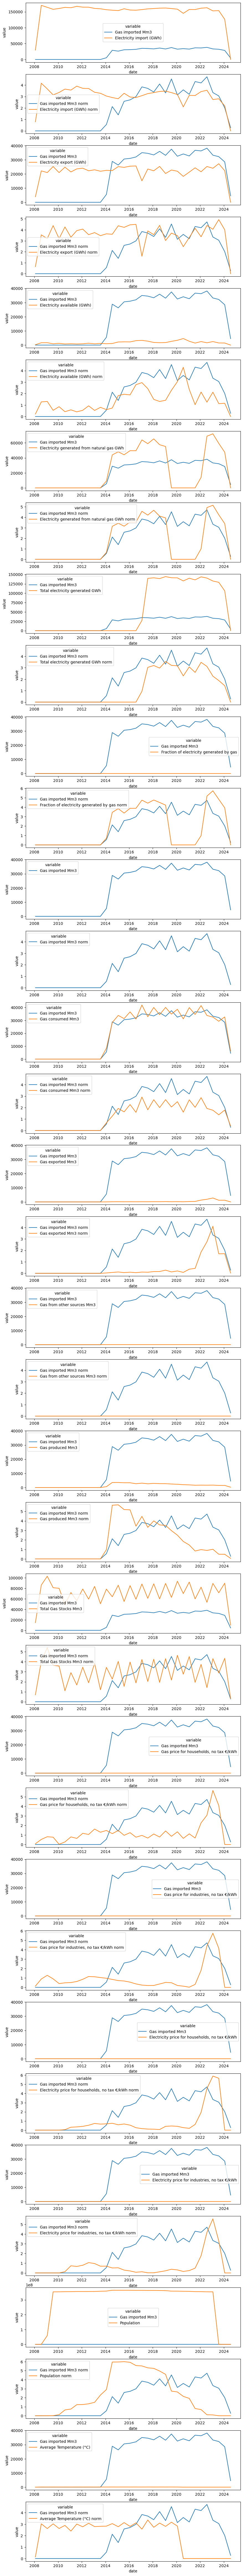

In [27]:
dfITn = dfITn.reset_index()
dfIT = dfIT.reset_index()
dfPlotb = pd.concat([dfIT,dfITn])
dfPlotb = dfPlotb.set_index('date')
dfPlotb = dfPlotb.resample('6M').sum()
dfPlotb = dfPlotb.reset_index()
fig, axes = plt.subplots(len(dfPlotb.columns)-1,1,figsize = (10,120))

dfITn = dfITn.set_index('date')
dfIT = dfIT.set_index('date')

j = 0
k = 1
for i in range(0,int((len(dfPlotb.columns)-1)/2)):
    sb.lineplot(x='date', y='value', hue='variable',data = pd.melt(dfPlotb[['date','Gas imported Mm3',dfPlotb.columns[k]]], ['date']), ax=axes[j])
    j = j + 1
    sb.lineplot(x='date', y='value', hue='variable',data = pd.melt(dfPlotb[['date','Gas imported Mm3 norm',dfPlotb.columns[int(k+(len(dfPlotb.columns)-1)/2)]]], ['date']), ax=axes[j])
    j = j + 1
    k = k + 1


Electricity/Gas prices for Industry/Households don't correlate well to gas imports. The same can be said for population. What is apparent, though, is that gas price for households follows the rule of supply and demand (when gas imports are high gas prices drops and vice versa). It remains relevant the correlation among prices.

Let's perform a time series analysis for some features, for the period up to december 2019.

Analyzing feature: Gas imported Mm3


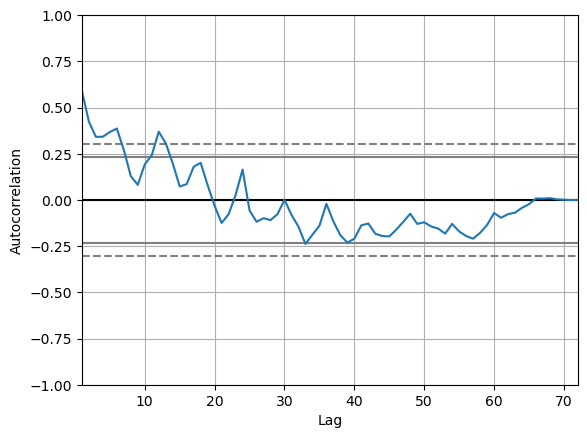

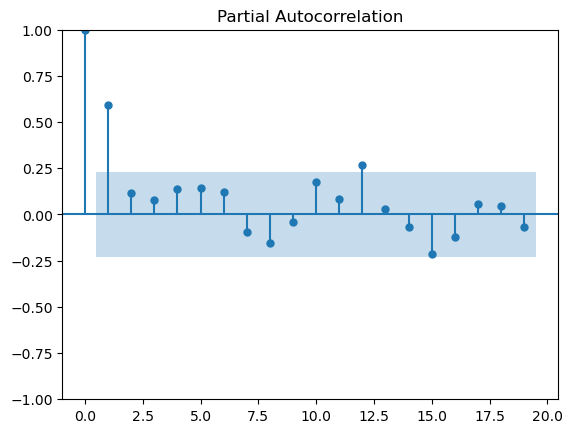

Analyzing feature: Gas produced Mm3


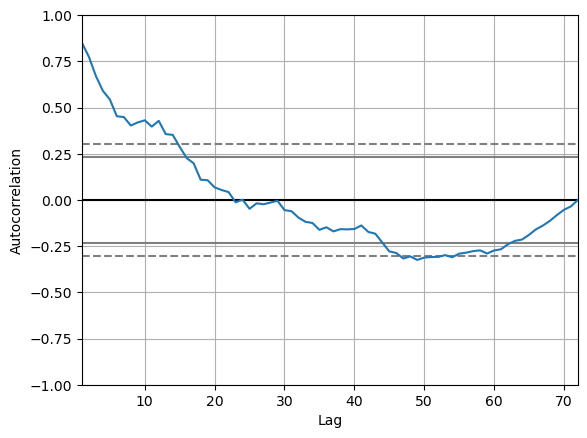

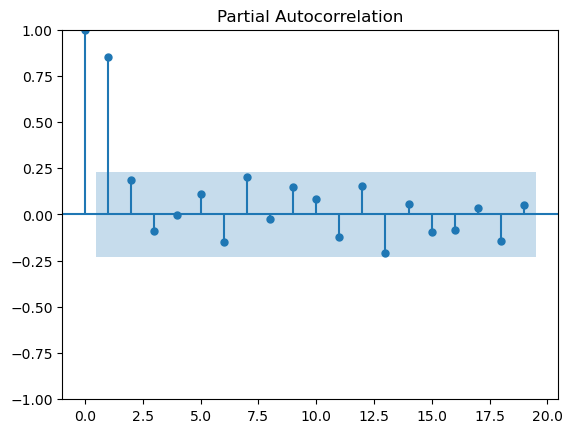

Analyzing feature: Gas price for households, no tax €/kWh


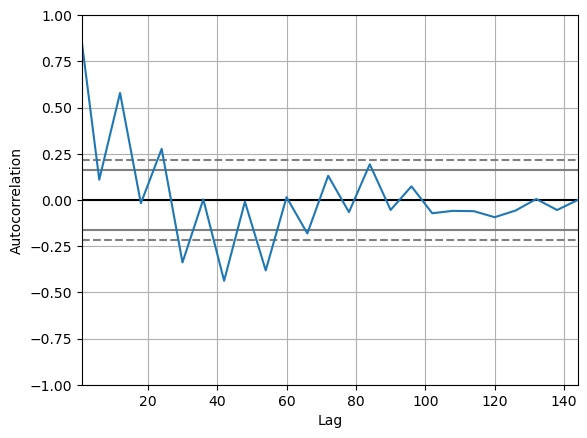

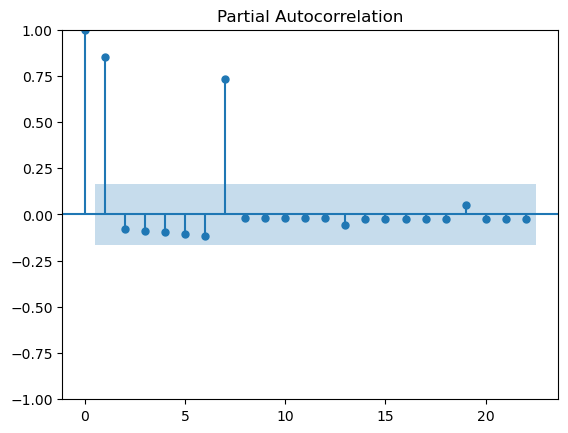

Analyzing feature: Electricity export (GWh)


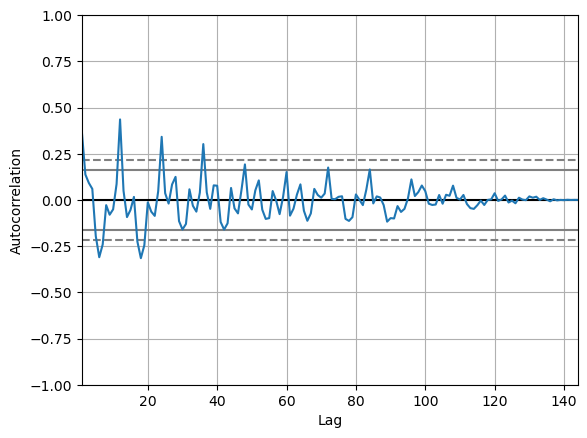

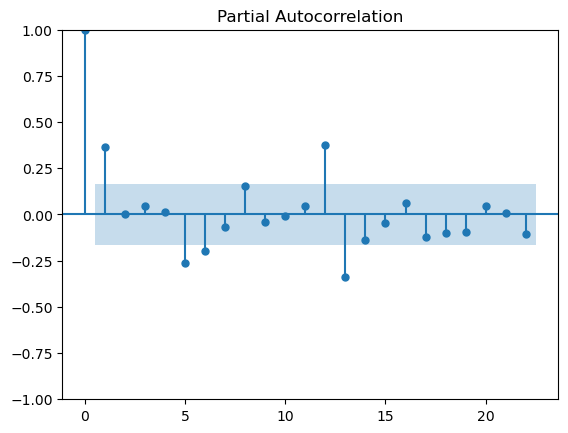

Analyzing feature: Total electricity generated GWh


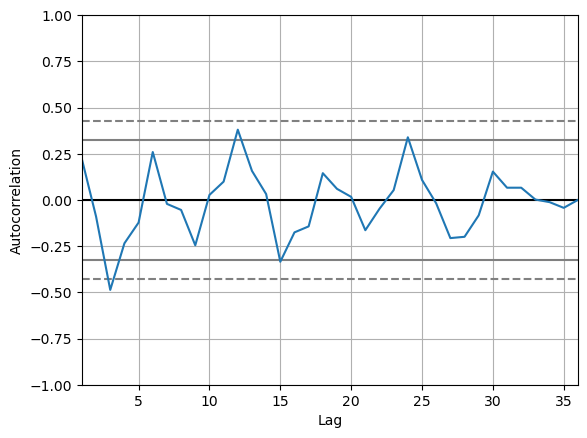

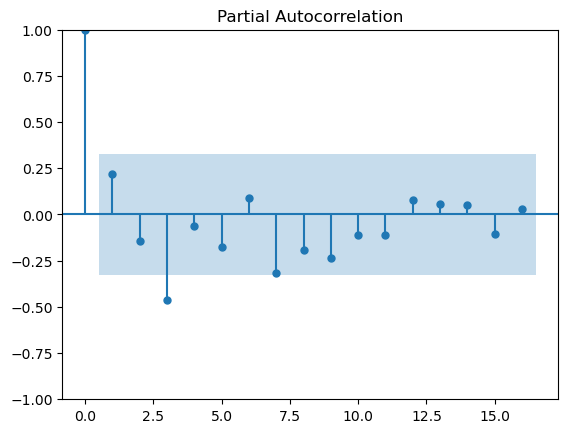

Analyzing feature: Gas consumed Mm3


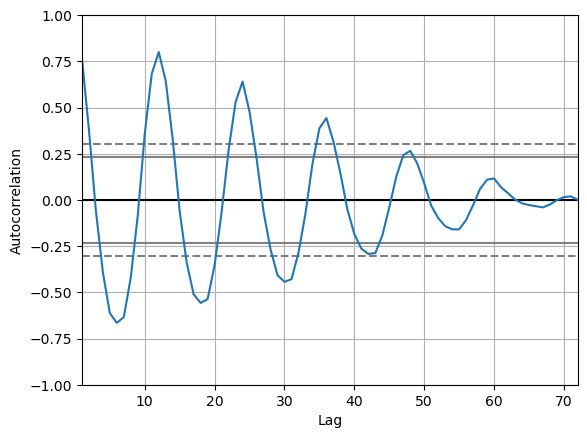

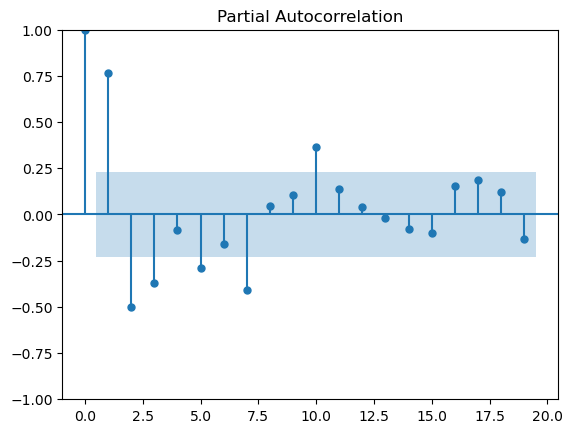

Analyzing feature: Total Gas Stocks Mm3


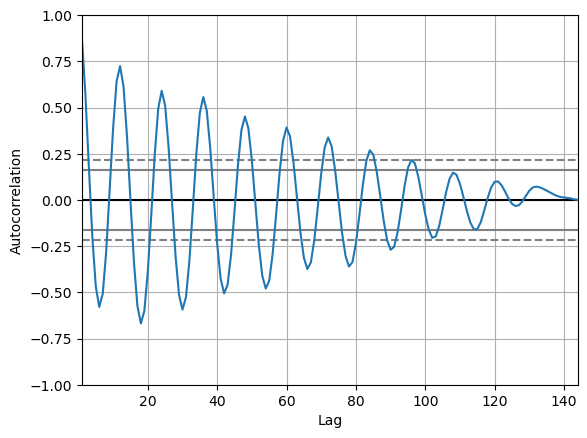

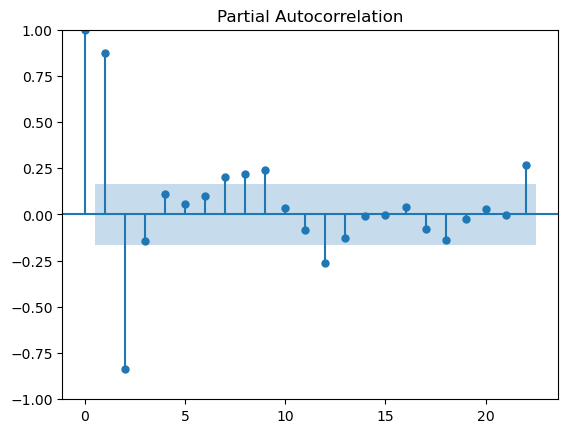

Analyzing feature: Average Temperature (°C)


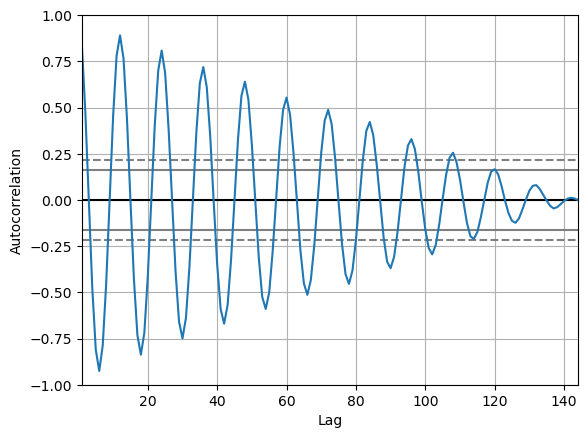

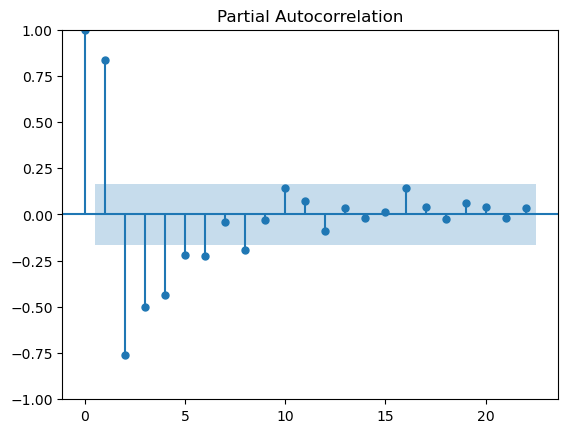

In [28]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.ar_model import AutoReg

#Suspected periodical features

periodics = ['Gas imported Mm3','Gas produced Mm3','Gas price for households, no tax €/kWh', 'Electricity export (GWh)','Total electricity generated GWh','Gas consumed Mm3','Total Gas Stocks Mm3','Average Temperature (°C)']

for i in periodics:
    plotter = dfIT.loc[(dfIT.loc[:,i].notna()) & (dfIT.index < '2020-01-01'),i]
    print('Analyzing feature: ' + plotter.name)
    '''
    #detailed tsa for a specified period
    res = sm.tsa.seasonal_decompose(plotter,period=4,model='additive')
    resplot = res.plot()
    '''

    #autocorrelation 
    autocorrelation_plot(plotter)
    plt.show()
    
    #Autocorrelation
    '''
    plot_acf(plotter,lags = 140)
    plt.show()
    '''
    #Partial autocorrelation
    
    plot_pacf(plotter)
    plt.show()
    

It looks like only the consumed gas, the total gas stocked and the temperature have a good degree of autocorrelation (0.74 or more in a certain lag). Moreover, all 3 seem to have a maximum value after 12 months and a minimum value (with high negative autocorrelation) after 6 months. Therefore, we will autoregress the consumed gas from 2014 to 2008 to complete the dataset.

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                  103
Model:             Restr. AutoReg(60)   Log Likelihood                -324.027
Method:               Conditional MLE   S.D. of innovations            453.310
Date:                Tue, 07 May 2024   AIC                            666.054
Time:                        13:35:53   BIC                            681.905
Sample:                            60   HQIC                           671.900
                                  103                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        509.3531    279.121      1.825      0.068     -37.713    1056.419
y.L1           0.1041      0.093      1.115      0.265      -0.079       0.287
y.L2          -0.0417      0.063     -0.657      0.5

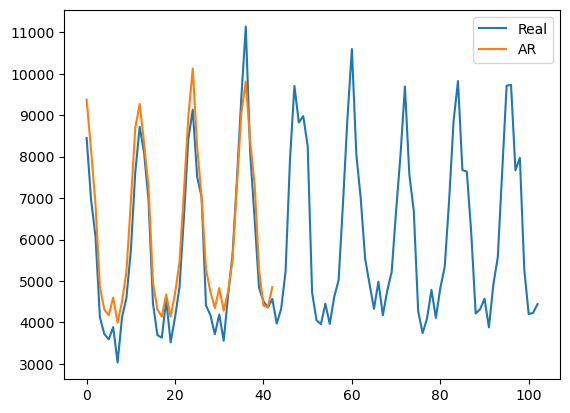

In [13]:
#Testing on itself
Y=dfIT.values[:,7]

split_point = round(len(Y)*0.9)
train, test = Y[0:split_point], Y[split_point:]

# train autoregression
model = AutoReg(train, lags=[1,2,12,24,36,48,60], missing='drop')
model_fit = model.fit()

print(model_fit.summary())
plt.plot(train[~np.isnan(train)],label='Real')
plt.plot(model_fit.fittedvalues,label='AR')
plt.legend()

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                  122
Model:             Restr. AutoReg(60)   Log Likelihood                -480.745
Method:               Conditional MLE   S.D. of innovations            563.979
Date:                Tue, 07 May 2024   AIC                            979.491
Time:                        13:35:53   BIC                            998.635
Sample:                            60   HQIC                           987.007
                                  122                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.2677    300.157      0.021      0.983    -582.029     594.565
y.L1           0.3029      0.095      3.173      0.002       0.116       0.490
y.L2          -0.1524      0.066     -2.312      0.0

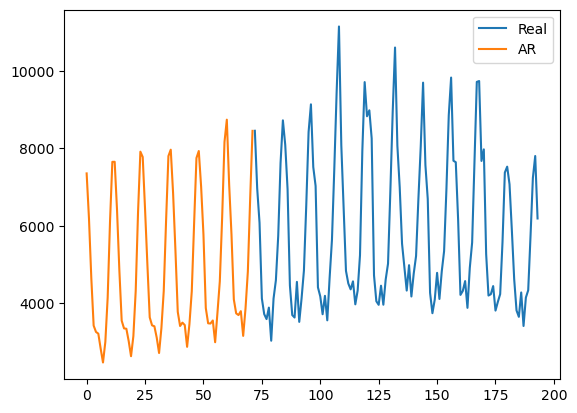

In [14]:
from statsmodels.tsa.ar_model import AutoReg

Y=np.flip(dfIT.values[:,7])

# train autoregression
model = AutoReg(Y, lags=[1,2,12,24,36,48,60], missing='drop')
model_fit = model.fit()

forecast = np.flip(model_fit.predict(start=len(Y[~np.isnan(Y)]), end=len(Y)-1))

Y=np.flip(Y)

print(model_fit.summary())
plt.plot(Y,label='Real')
plt.plot(forecast,label='AR')
plt.legend()

Good enough.

<Axes: xlabel='date', ylabel='Gas consumed Mm3'>

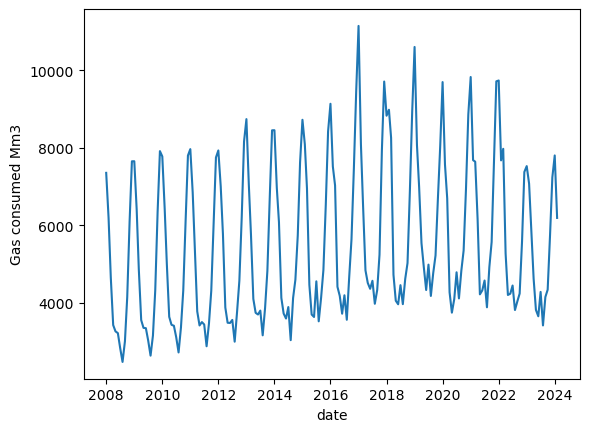

In [15]:
dfIT.loc[dfIT.index<'2014-01-01','Gas consumed Mm3'] = forecast
sb.lineplot(data=dfIT.loc[:,'Gas consumed Mm3'])

We will now delete some data. Later, we will generate more features, mainly by extracting values, delaying data and generally modifying it.

In [16]:
dfIT = dfIT.drop(['Electricity export (GWh)','Electricity available (GWh)','Gas from other sources Mm3','Population'],axis = 1)
dfIT = dfIT.drop(['Gas price for households, no tax €/kWh','Gas price for industries, no tax €/kWh','Electricity price for households, no tax €/kWh'],axis=1)
dfIT = dfIT.drop(['Electricity price for industries, no tax €/kWh'],axis=1)

dfIT.to_csv('Data_03.csv', index=True)